<a href="https://colab.research.google.com/github/wiraindrawan/Telkom-Athon-4/blob/main/Unsupervised_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Attributes

People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

Promotion
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

In [1]:
import pandas as pd # like excel
import numpy as np # library matematika
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/940144/Documents/Telkom/Athon/Practice Class/marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Cek informasi general terkait dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**ID**

Kolom ID tidak dibutuhkan sehingga kita drop

In [4]:
df.drop(columns='ID', inplace=True)

**Education**

Kolom Education memiliki tipe string. Karena data berbentuk dalam order. Sehingga perlu kita ubah menjadi "int" dengan mapping.

In [5]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Buat map dengan dengan urutan pendidikan terendah ke tertinggi.

In [6]:
education_map = {
    'Basic':1,
    '2n Cycle':2,
    'Graduation':3,
    'Master':4,
    'PhD':5
}

Lalu gunakan fungsi .map untuk mengganti value sesuai dengan mapping yang telah kita buat sebelumnya.

In [7]:
df['Education'] = df['Education'].map(education_map)

In [8]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,3,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,3,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,3,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,3,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,5,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


**Marital Status**

In [10]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Kita ubah menjadi status single or couple. Dengan mapping single = 0 dan couple = 1.

In [11]:
ms_map = {'Single': 0,
          'Together': 1,
          'Married': 1,
          'Divorced':0,
          'Widow':0,
          'Alone':0,
          'Absurd':0,
          'YOLO':0}

df['Marital_Status'] = df['Marital_Status'].map(ms_map)

**Dt_Customer**

Karena tidak ada informasi kapan data ini diambil. Kita asumsikan bahwa pelanggan terbaru merupakan hari dimana data ini diambil.

Sebelumnya kita ubah tipe data dari object menjadi datetime.

In [12]:
# Ganti data dari tipe Object menjadi DateTime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

Kita cari tanggal terbaru. Lalu kita menghitung lama berlangganan dengan cara membandingkan perbedaan hari antar tanggal.

In [13]:
max_date = df['Dt_Customer'].max()
print(max_date)

2014-06-29 00:00:00


In [14]:
# Hitung perbedaan dalam hari
df['Customer_Days'] = (max_date - df['Dt_Customer']) / np.timedelta64(1, 'D')
df.head(2)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Days
0,1957,3,0,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,3,11,1,663.0
1,1954,3,0,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,3,11,0,113.0


**Year_Birth**

Mencari tahu umur pelanggan

In [15]:
max_year = df['Dt_Customer'].dt.year.max()
print(max_year)

2014


In [16]:
df['Age'] = max_year-df['Year_Birth']
df.drop(columns='Year_Birth',axis=1,inplace=True)
df.drop(columns='Dt_Customer',axis=1,inplace=True)
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Days,Age
0,3,0,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,663.0,57
1,3,0,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,113.0,60


**Total Product**

Mendapatkan total produk yang dibeli dengan menjumlahkan semua produk.

In [17]:
df['total_product'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

**Total Child**

Mendapatkan jumlah anak yang dimiliki dengan menjumlah anak kecil dan remaja

In [18]:
df['total_child'] = df['Kidhome'] + df['Teenhome']

**Is Parent**

Mengetahui apakah costumer orang tua atau tidak.

In [19]:
df['is_parent'] = df['total_child'].apply(lambda x: 1 if x > 0 else 0)

Sekarang kita cek apakah masih ada data dalam bentuk selain numerical

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   int64  
 1   Marital_Status       2240 non-null   int64  
 2   Income               2216 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

Terdapat value kosong pada "Income".

In [21]:
df['Income'] = df['Income'].fillna(value=df['Income'].mean())

In [22]:
features = [x for x in df.columns]

**Exploration**

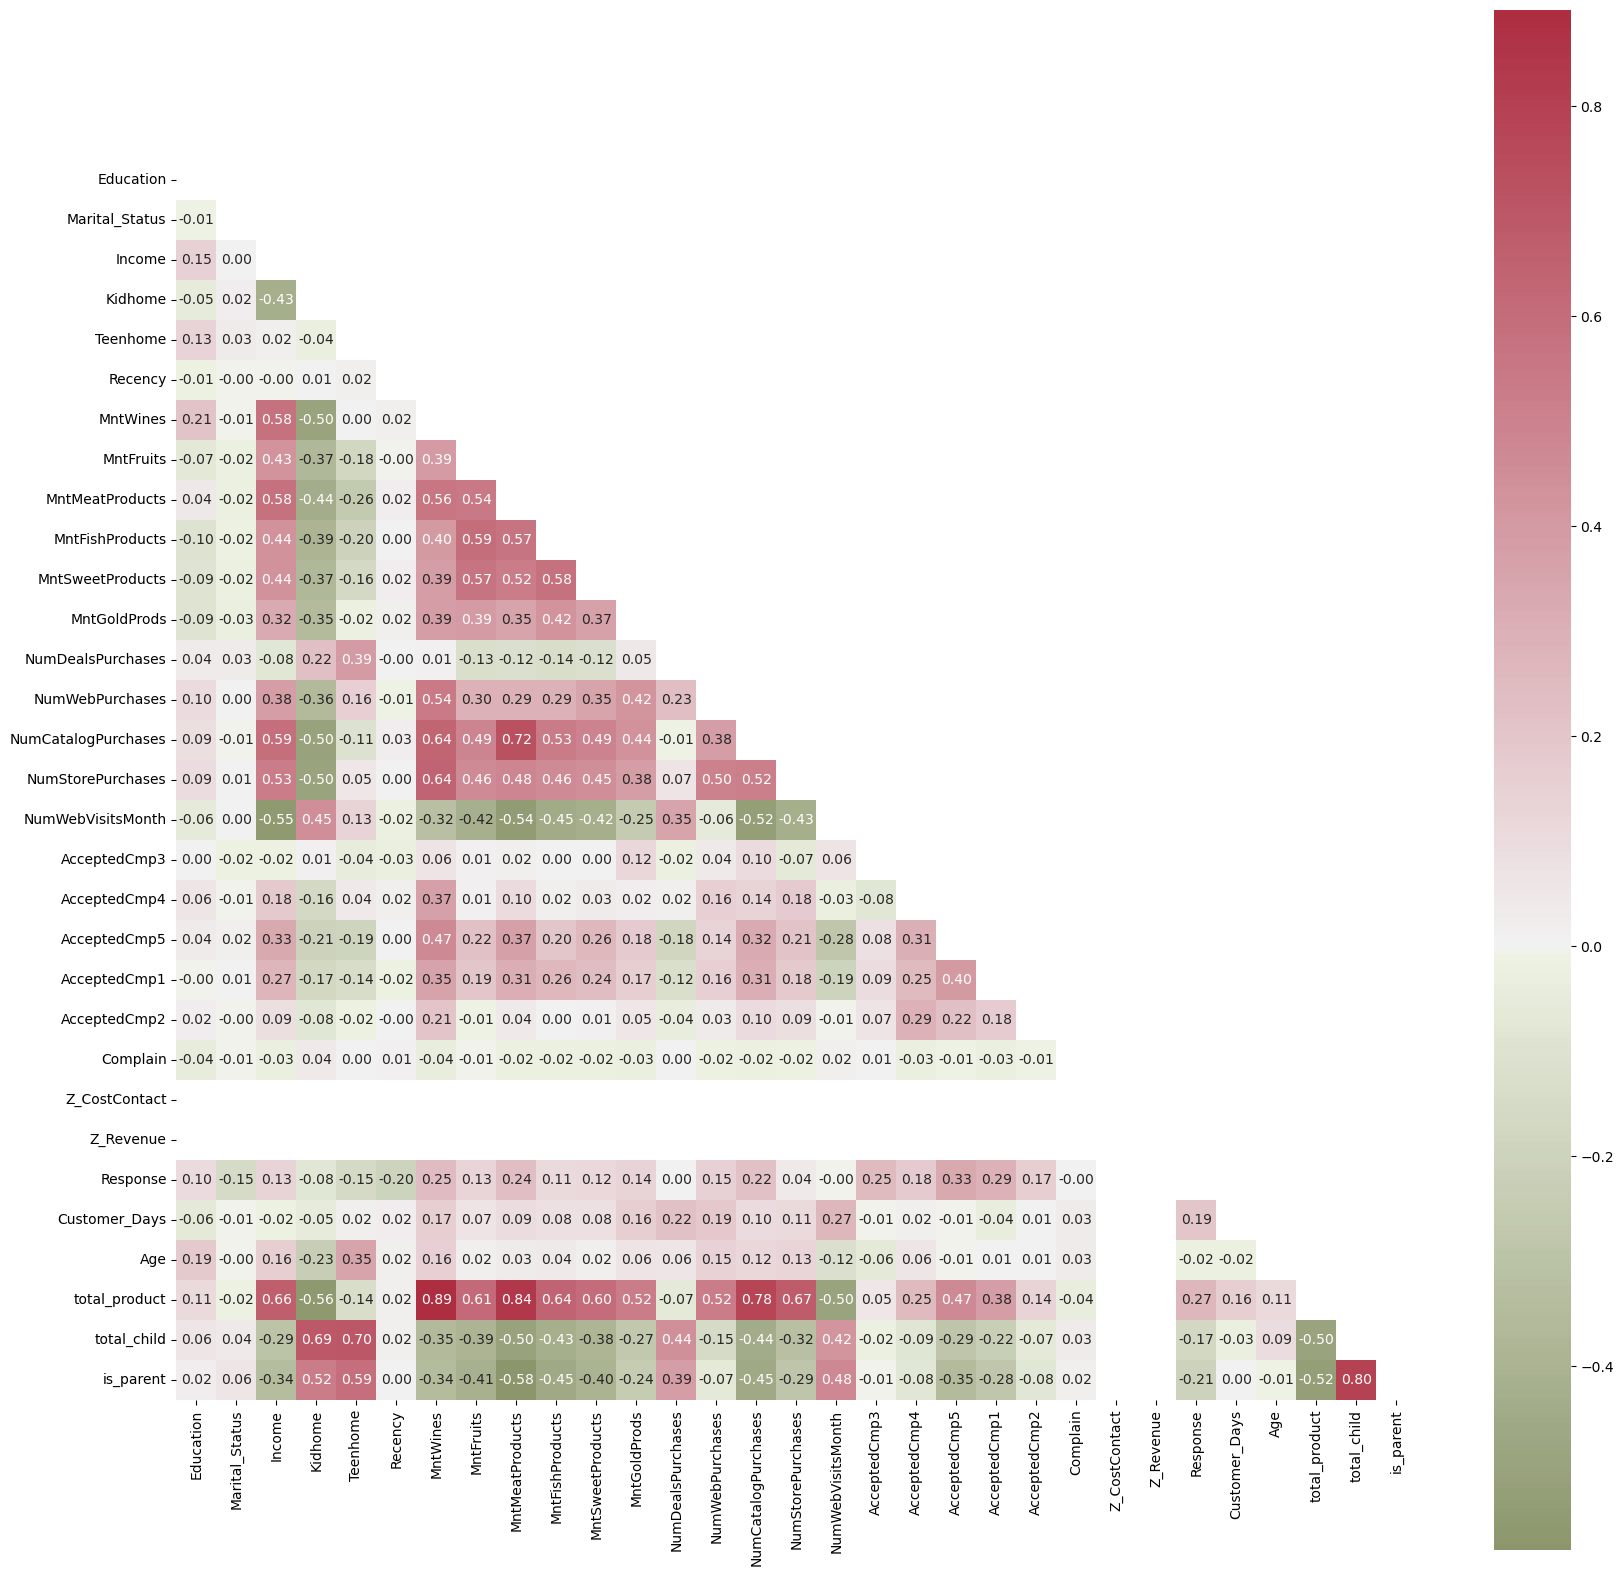

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation
corr = df.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# Create a custom divergin palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

plt.figure(figsize=(20, 20))
sns.heatmap(corr, mask=matrix, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.show()

Pada umumnya jika ada korelasi > 0.5 kita perlu melakukan transformasi pada data. Karena untuk machine learning kita membutuhkan data yang tidak saling berkorelasi satu sama lainnya.

Tetapi mari kita drop Zcostcontact dan zrevenue karena data yang error.

In [24]:
df.drop(columns=['Z_CostContact','Z_Revenue'], inplace=True)

### Unsupervised 1: Dimension Reduction

Salah satu fungsi ada mengurangi dimensi. Kita kesulitan ketika ingin menvisualisasi tetapi kolumnya banyak makan akan sulit untuk melihatnya.

In [25]:
df.dropna(inplace=True)

from sklearn.decomposition import PCA
# Apply PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)

# Create a DataFrame for the reduced data with anomaly labels
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

**Method 1: PCA**

Mereduksi menjadi 2 dimensi

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


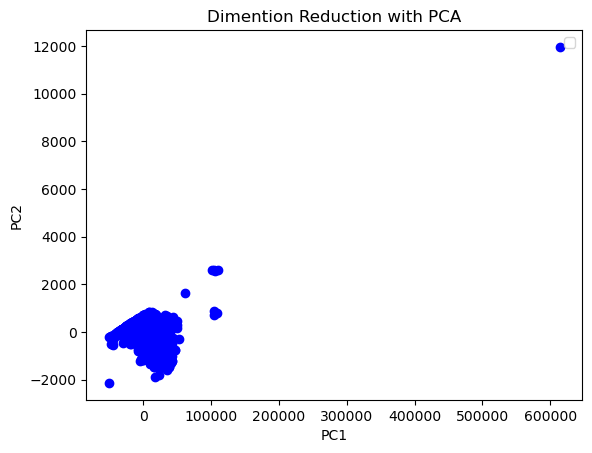

In [26]:
# Plot the anomalies in the reduced space
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Dimention Reduction with PCA')
plt.legend()
plt.show()

**Method 2: t-SNE**

Metode lainnya yang dapat digunakan untuk mereduksi adalah t-SNE

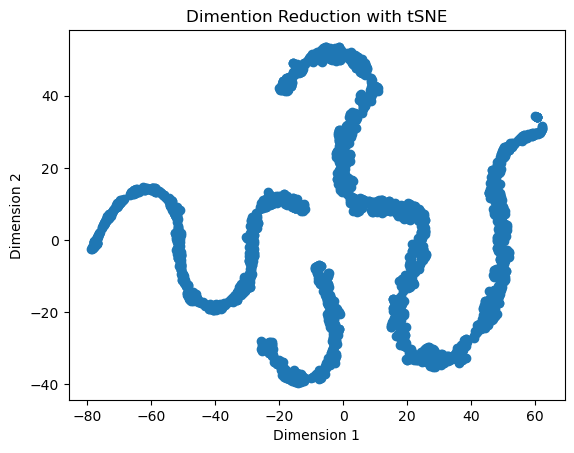

In [41]:
from sklearn.manifold import TSNE

# Create a t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Apply t-SNE to reduce the data to 2 dimensions
tsne_data = tsne.fit_transform(df)
tsne_df = pd.DataFrame(tsne_data, columns=['PC1', 'PC2'])

# Plot the data points in 2D
plt.scatter(tsne_df['PC1'], tsne_df['PC2'])
plt.title('Dimention Reduction with tSNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Clustering

Pada kali ini kita akan menggunakan 3 cara:
* 1. Clusterting pada data asli
* 2. Clusterting pada data yang telah diolah dengan PCA
* 3. Clustering pada data yang telah diolah dengan t-SNE

Lalu setiap cara kita gunakan 2 model clustering yaitu KMeans & DBScan

Terdapat beberapa kelebihan dan kekurangan dari masing-masing metode. Tetapi yang paling umum adalah ketika menggunakan dimension reduction, maka model akan berjalan lebih cepat karena data yang dilihat menjadi lebih sedikit.

Tetapi kita kehilangan banyak data dan pattern karena data dengan dimensi yang tinggi itu dikurangi menjadi lebih kecil dari data aslinya.

## Clustering Pada Data Asli

**KMeans**

In [27]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [28]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Ketika kita ingin menggunakan KMeans. Kita perlu memberi tahukan jumlah cluster yang kita inginkan. Salah satu metode yang paling umum untuk menentukan jumlah cluster adalah menggunakan "Elbow" atau "Silhoutte" method.

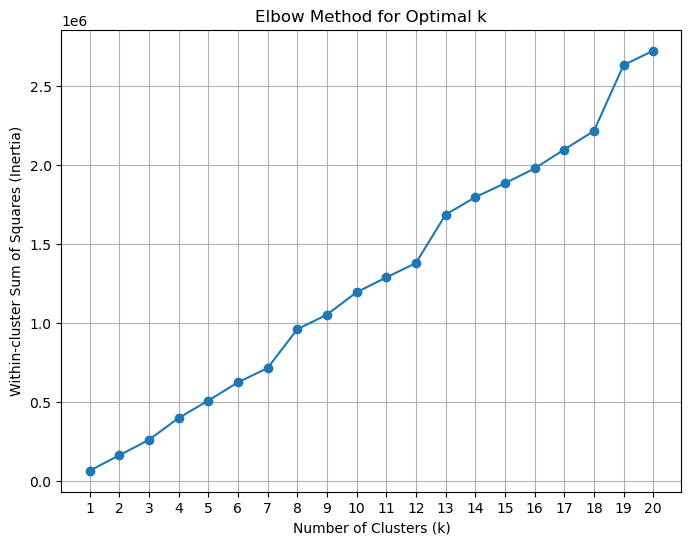

In [32]:
# Function to calculate within-cluster sum of squares (inertia)
def calculate_inertia(data, centers):
    return np.sum((data - centers[:, np.newaxis]) ** 2)

# Create an empty list to store the inertia values
inertia = []

# Specify the range of values of k (number of clusters) to try
k_values = range(1, 21)

# Iterate over different values of k
for k in k_values:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, n_init='auto',random_state=42)
    # Fit the model to the data
    kmeans.fit(df_scaled)
    # Calculate the inertia (within-cluster sum of squares) and append to the list
    inertia.append(calculate_inertia(df_scaled, kmeans.cluster_centers_))

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Jika kita menemukan bahwa elbow memberikan hasil yang tidak sesuai, maka kita akan menggunakan silhoutte.

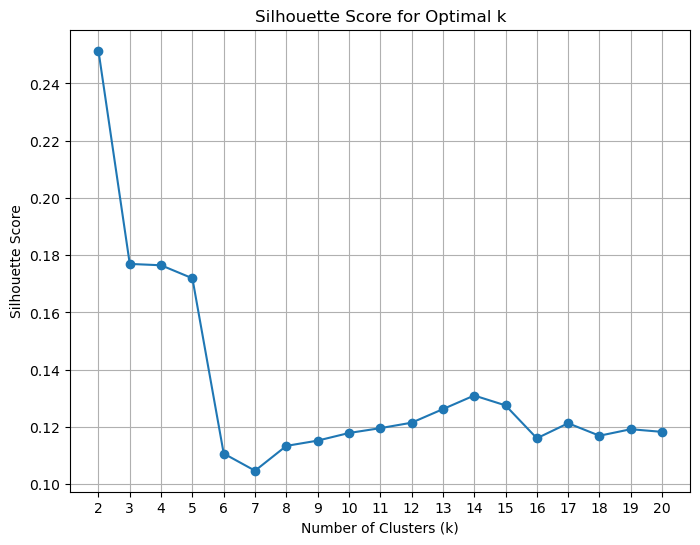

In [36]:
from sklearn.metrics import silhouette_score

# Create an empty list to store silhouette scores
silhouette_scores = []

# Specify the range of values of k (number of clusters) to try
k_values = range(2, 21)

# Iterate over different values of k
for k in k_values:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, n_init='auto',random_state=42)
    # Fit the model to the data
    kmeans.fit(df_scaled)
    # Get the cluster labels for each data point
    cluster_labels = kmeans.predict(df_scaled)
    # Calculate the silhouette score for this clustering
    score = silhouette_score(df_scaled, cluster_labels)
    # Append the score to the list
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Dari sillhoute didapatkan jumlah cluster 2 memberikan nilai tertinggi.

In [37]:
kmeans = KMeans(n_clusters=2, n_init='auto',random_state=42)
# Fit the model to the data
kmeans.fit(df_scaled)
# Get the cluster labels for each data point
df['kmeans_label'] = kmeans.predict(df_scaled)

Mencoba visualisasikan pada PCA 2 dimensi

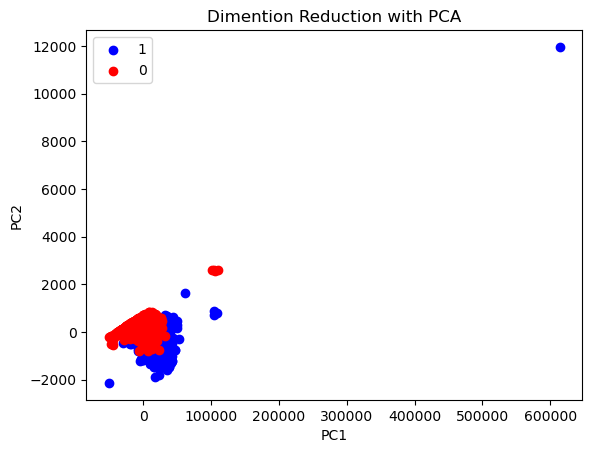

In [38]:
pca_df['label_kmeans'] = df['kmeans_label']

# Plot the anomalies in the reduced space
plt.scatter(pca_df.loc[pca_df['label_kmeans'] == 1, 'PC1'], pca_df.loc[pca_df['label_kmeans'] == 1, 'PC2'], color='blue', label='1')
plt.scatter(pca_df.loc[pca_df['label_kmeans'] == 0, 'PC1'], pca_df.loc[pca_df['label_kmeans'] == 0, 'PC2'], color='red', label='0')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Dimention Reduction with PCA')
plt.legend()
plt.show()

Mencoba visualisasikan pada t-SNE 2 dimensi

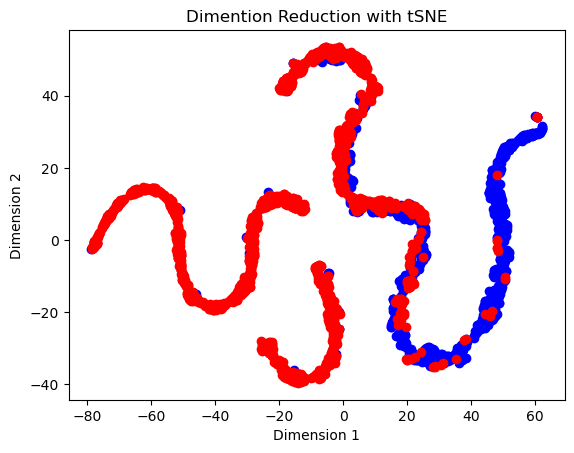

In [42]:
tsne_df['label_kmeans'] = df['kmeans_label']

# Plot the anomalies in the reduced space
plt.scatter(tsne_df.loc[tsne_df['label_kmeans'] == 1, 'PC1'], tsne_df.loc[tsne_df['label_kmeans'] == 1, 'PC2'], color='blue', label='1')
plt.scatter(tsne_df.loc[tsne_df['label_kmeans'] == 0, 'PC1'], tsne_df.loc[tsne_df['label_kmeans'] == 0, 'PC2'], color='red', label='0')
plt.title('Dimention Reduction with tSNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## DBScan

In [43]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)

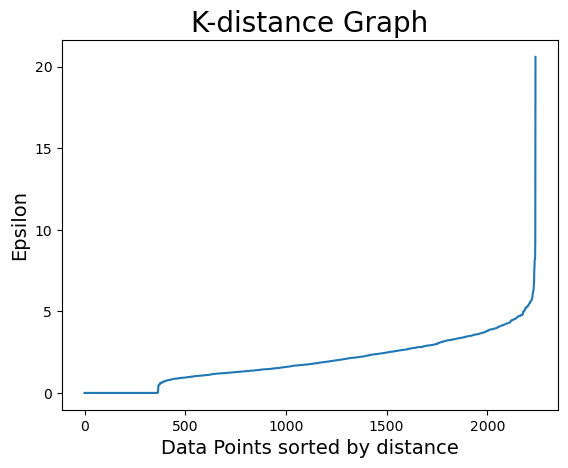

In [44]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [45]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=5)
dbscan.fit(df_scaled)

DBSCAN(eps=5)

In [46]:
df['label_db'] = dbscan.labels_
df['label_db'].unique()

array([ 0, -1,  1,  2])

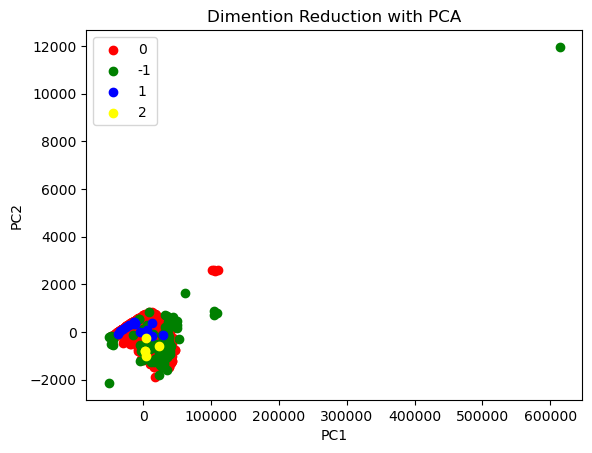

In [47]:
pca_df['label_db'] = df['label_db']

# Plot the anomalies in the reduced space
# plt.scatter(pca_df.loc[pca_df['label_db'] == 1, 'PC1'], pca_df.loc[pca_df['label_db'] == 1, 'PC2'], color='blue', label='1')
plt.scatter(pca_df.loc[pca_df['label_db'] == 0, 'PC1'], pca_df.loc[pca_df['label_db'] == 0, 'PC2'], color='red', label='0')
plt.scatter(pca_df.loc[pca_df['label_db'] == -1, 'PC1'], pca_df.loc[pca_df['label_db'] == -1, 'PC2'], color='green', label='-1')
plt.scatter(pca_df.loc[pca_df['label_db'] == 1, 'PC1'], pca_df.loc[pca_df['label_db'] == 1, 'PC2'], color='blue', label='1')
plt.scatter(pca_df.loc[pca_df['label_db'] == 2, 'PC1'], pca_df.loc[pca_df['label_db'] == 2, 'PC2'], color='yellow', label='2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Dimention Reduction with PCA')
plt.legend()
plt.show()

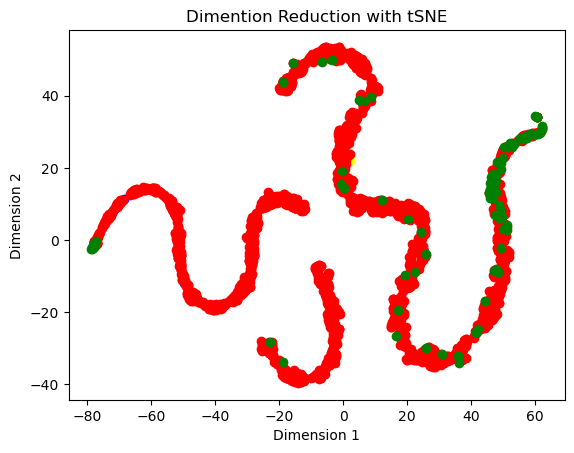

In [48]:
tsne_df['label_db'] = df['label_db']

# Plot the anomalies in the reduced space
plt.scatter(tsne_df.loc[tsne_df['label_db'] == 2, 'PC1'], tsne_df.loc[tsne_df['label_db'] == 2, 'PC2'], color='yellow', label='2')
plt.scatter(tsne_df.loc[tsne_df['label_db'] == 1, 'PC1'], tsne_df.loc[tsne_df['label_db'] == 1, 'PC2'], color='blue', label='1')
plt.scatter(tsne_df.loc[tsne_df['label_db'] == 0, 'PC1'], tsne_df.loc[tsne_df['label_db'] == 0, 'PC2'], color='red', label='0')
plt.scatter(tsne_df.loc[tsne_df['label_db'] == -1, 'PC1'], tsne_df.loc[tsne_df['label_db'] == -1, 'PC2'], color='green', label='-1')
plt.title('Dimention Reduction with tSNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [84]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Days,Age,total_product,total_child,is_parent,kmeans_label,label_db,pca_kmeans_label,pca_label_db,tsne_kmeans_label,tsne_dbscan_label
0,3,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663.0,57,1617,0,0,1,0,1,0,1,0
1,3,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113.0,60,27,2,1,0,0,0,0,2,0
2,3,1,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312.0,49,776,0,0,1,0,1,0,3,0
3,3,1,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139.0,30,53,1,1,0,0,0,0,0,1
4,5,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161.0,33,422,1,1,0,0,0,0,1,0


## Clustering Pada Data PCA

In [49]:
scaler = StandardScaler()
pca_scaled = scaler.fit_transform(pca_df[['PC1','PC2']])

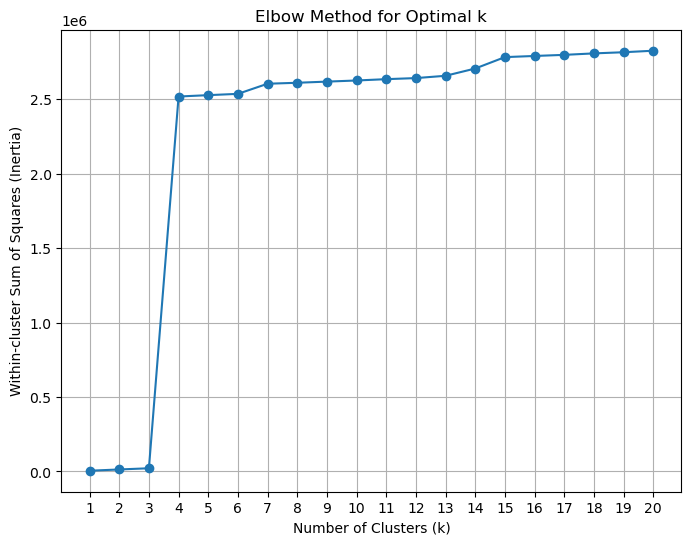

In [50]:
# Function to calculate within-cluster sum of squares (inertia)
def calculate_inertia(data, centers):
    return np.sum((data - centers[:, np.newaxis]) ** 2)

# Create an empty list to store the inertia values
inertia = []

# Specify the range of values of k (number of clusters) to try
k_values = range(1, 21)

# Iterate over different values of k
for k in k_values:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, n_init='auto',random_state=42)
    # Fit the model to the data
    kmeans.fit(pca_scaled)
    # Calculate the inertia (within-cluster sum of squares) and append to the list
    inertia.append(calculate_inertia(pca_scaled, kmeans.cluster_centers_))

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Jika kita menemukan bahwa elbow memberikan hasil yang tidak sesuai, maka kita akan menggunakan silhoutte.

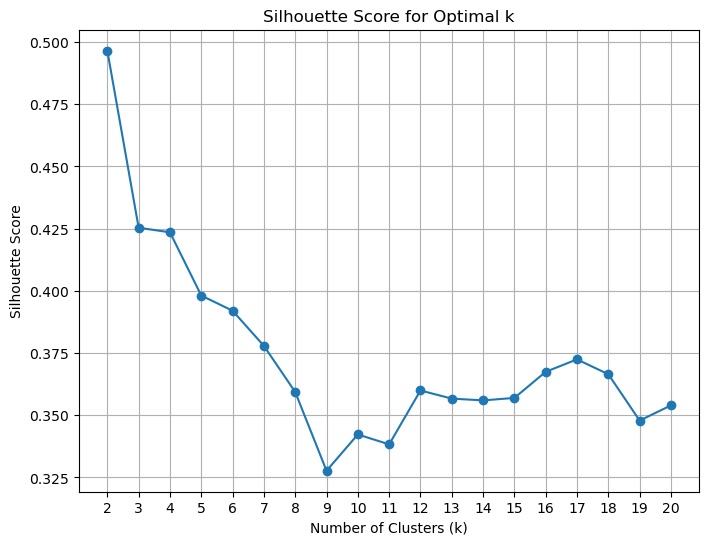

In [51]:
from sklearn.metrics import silhouette_score

# Create an empty list to store silhouette scores
silhouette_scores = []

# Specify the range of values of k (number of clusters) to try
k_values = range(2, 21)

# Iterate over different values of k
for k in k_values:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, n_init='auto',random_state=42)
    # Fit the model to the data
    kmeans.fit(pca_scaled)
    # Get the cluster labels for each data point
    cluster_labels = kmeans.predict(pca_scaled)
    # Calculate the silhouette score for this clustering
    score = silhouette_score(pca_scaled, cluster_labels)
    # Append the score to the list
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Dari sillhoute didapatkan jumlah cluster 2 memberikan nilai tertinggi.

In [52]:
kmeans = KMeans(n_clusters=2, n_init='auto',random_state=42)
# Fit the model to the data
kmeans.fit(pca_scaled)
# Get the cluster labels for each data point
df['pca_kmeans_label'] = kmeans.predict(pca_scaled)

In [53]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Response,Customer_Days,Age,total_product,total_child,is_parent,kmeans_label,label_db,pca_kmeans_label
0,3,0,58138.0,0,0,58,635,88,546,172,...,0,1,663.0,57,1617,0,0,1,0,1
1,3,0,46344.0,1,1,38,11,1,6,2,...,0,0,113.0,60,27,2,1,0,0,0
2,3,1,71613.0,0,0,26,426,49,127,111,...,0,0,312.0,49,776,0,0,1,0,1
3,3,1,26646.0,1,0,26,11,4,20,10,...,0,0,139.0,30,53,1,1,0,0,0
4,5,1,58293.0,1,0,94,173,43,118,46,...,0,0,161.0,33,422,1,1,0,0,0


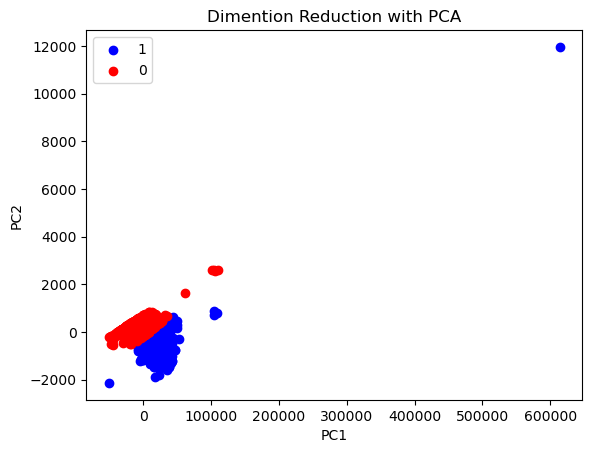

In [54]:
pca_df['pca_label_kmeans'] = df['pca_kmeans_label']

# Plot the anomalies in the reduced space
plt.scatter(pca_df.loc[pca_df['pca_label_kmeans'] == 1, 'PC1'], pca_df.loc[pca_df['pca_label_kmeans'] == 1, 'PC2'], color='blue', label='1')
plt.scatter(pca_df.loc[pca_df['pca_label_kmeans'] == 0, 'PC1'], pca_df.loc[pca_df['pca_label_kmeans'] == 0, 'PC2'], color='red', label='0')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Dimention Reduction with PCA')
plt.legend()
plt.show()

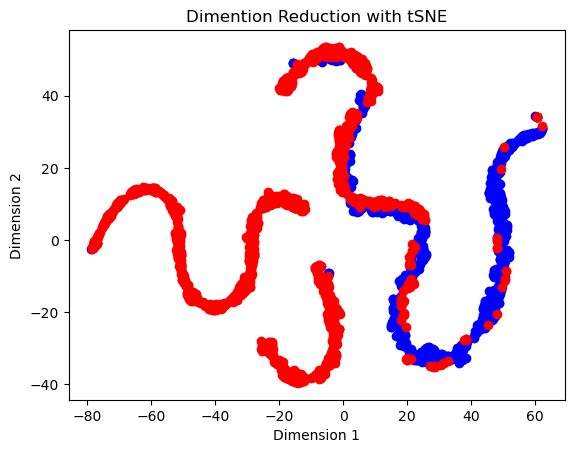

In [55]:
tsne_df['pca_kmeans_label'] = df['pca_kmeans_label']

# Plot the anomalies in the reduced space
plt.scatter(tsne_df.loc[tsne_df['pca_kmeans_label'] == 1, 'PC1'], tsne_df.loc[tsne_df['pca_kmeans_label'] == 1, 'PC2'], color='blue', label='1')
plt.scatter(tsne_df.loc[tsne_df['pca_kmeans_label'] == 0, 'PC1'], tsne_df.loc[tsne_df['pca_kmeans_label'] == 0, 'PC2'], color='red', label='0')
plt.title('Dimention Reduction with tSNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## DBScan

In [56]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors()
nbrs = neigh.fit(pca_scaled)
distances, indices = nbrs.kneighbors(pca_scaled)

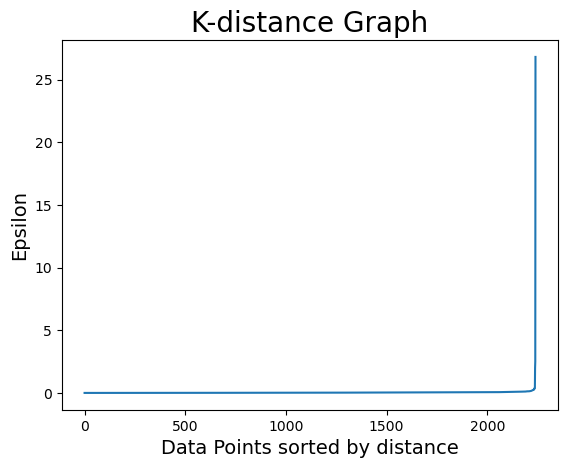

In [57]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [58]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=5)
dbscan.fit(pca_scaled)

DBSCAN(eps=5)

In [59]:
df['pca_label_db'] = dbscan.labels_
df['pca_label_db'].unique()

array([ 0, -1])

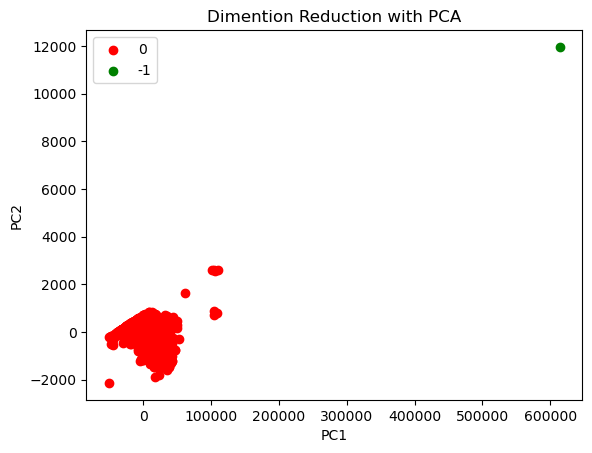

In [60]:
pca_df['pca_label_db'] = df['pca_label_db']

# Plot the anomalies in the reduced space
# plt.scatter(pca_df.loc[pca_df['label_db'] == 1, 'PC1'], pca_df.loc[pca_df['label_db'] == 1, 'PC2'], color='blue', label='1')
plt.scatter(pca_df.loc[pca_df['pca_label_db'] == 0, 'PC1'], pca_df.loc[pca_df['pca_label_db'] == 0, 'PC2'], color='red', label='0')
plt.scatter(pca_df.loc[pca_df['pca_label_db'] == -1, 'PC1'], pca_df.loc[pca_df['pca_label_db'] == -1, 'PC2'], color='green', label='-1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Dimention Reduction with PCA')
plt.legend()
plt.show()

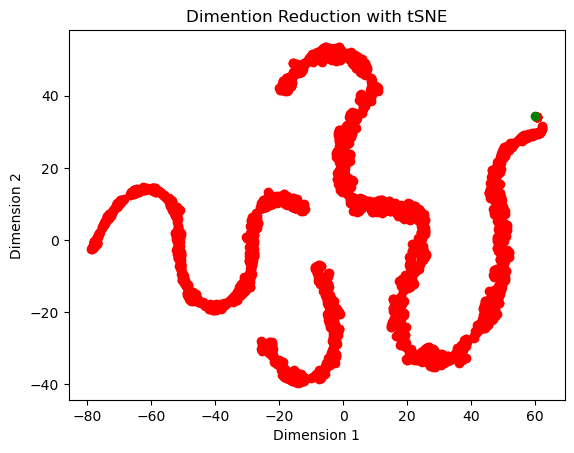

In [61]:
tsne_df['pca_label_db'] = df['pca_label_db']

# Plot the anomalies in the reduced space
plt.scatter(tsne_df.loc[tsne_df['pca_label_db'] == 0, 'PC1'], tsne_df.loc[tsne_df['pca_label_db'] == 0, 'PC2'], color='red', label='0')
plt.scatter(tsne_df.loc[tsne_df['pca_label_db'] == -1, 'PC1'], tsne_df.loc[tsne_df['pca_label_db'] == -1, 'PC2'], color='green', label='-1')
plt.title('Dimention Reduction with tSNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [85]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Days,Age,total_product,total_child,is_parent,kmeans_label,label_db,pca_kmeans_label,pca_label_db,tsne_kmeans_label,tsne_dbscan_label
0,3,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663.0,57,1617,0,0,1,0,1,0,1,0
1,3,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113.0,60,27,2,1,0,0,0,0,2,0
2,3,1,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312.0,49,776,0,0,1,0,1,0,3,0
3,3,1,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139.0,30,53,1,1,0,0,0,0,0,1
4,5,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161.0,33,422,1,1,0,0,0,0,1,0


## t-SNE

In [62]:
scaler = StandardScaler()
tsne_scaled = scaler.fit_transform(tsne_df[['PC1','PC2']])

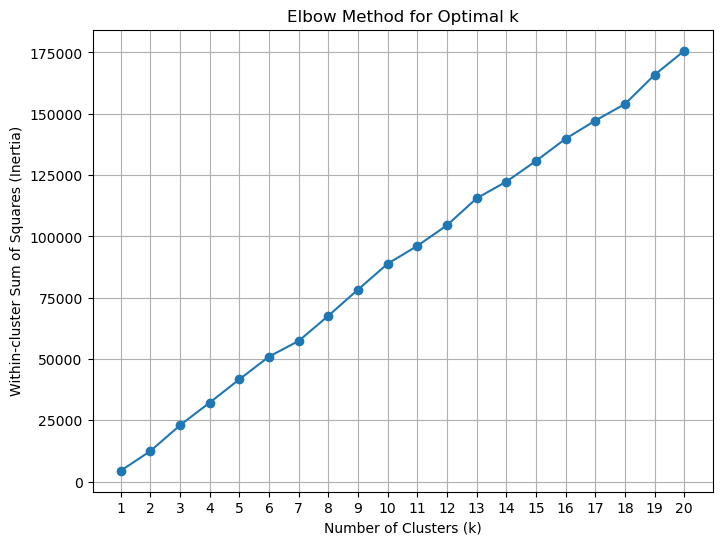

In [63]:
# Function to calculate within-cluster sum of squares (inertia)
def calculate_inertia(data, centers):
    return np.sum((data - centers[:, np.newaxis]) ** 2)

# Create an empty list to store the inertia values
inertia = []

# Specify the range of values of k (number of clusters) to try
k_values = range(1, 21)

# Iterate over different values of k
for k in k_values:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, n_init='auto',random_state=42)
    # Fit the model to the data
    kmeans.fit(tsne_scaled)
    # Calculate the inertia (within-cluster sum of squares) and append to the list
    inertia.append(calculate_inertia(tsne_scaled, kmeans.cluster_centers_))

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Jika kita menemukan bahwa elbow memberikan hasil yang tidak sesuai, maka kita akan menggunakan silhoutte.

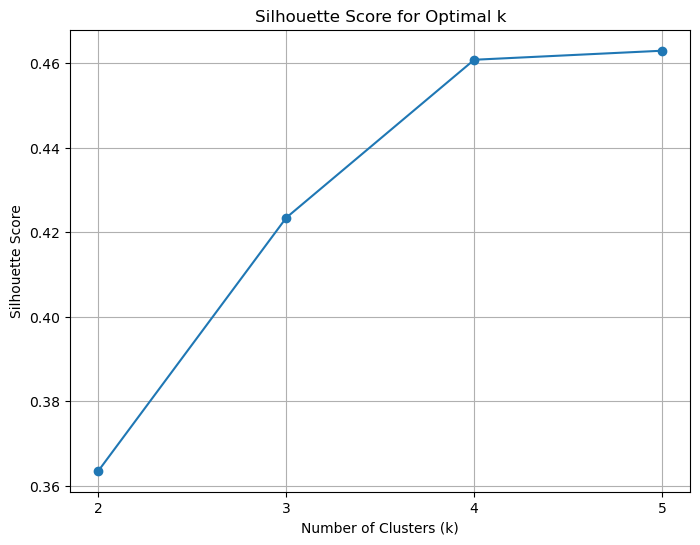

In [66]:
from sklearn.metrics import silhouette_score

# Create an empty list to store silhouette scores
silhouette_scores = []

# Specify the range of values of k (number of clusters) to try
k_values = range(2, 6)

# Iterate over different values of k
for k in k_values:
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, n_init='auto',random_state=42)
    # Fit the model to the data
    kmeans.fit(tsne_scaled)
    # Get the cluster labels for each data point
    cluster_labels = kmeans.predict(tsne_scaled)
    # Calculate the silhouette score for this clustering
    score = silhouette_score(tsne_scaled, cluster_labels)
    # Append the score to the list
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Dari sillhoute didapatkan jumlah cluster 4 memberikan nilai tertinggi.

In [67]:
kmeans = KMeans(n_clusters=4, n_init='auto',random_state=42)
# Fit the model to the data
kmeans.fit(tsne_scaled)
# Get the cluster labels for each data point
df['tsne_kmeans_label'] = kmeans.predict(tsne_scaled)

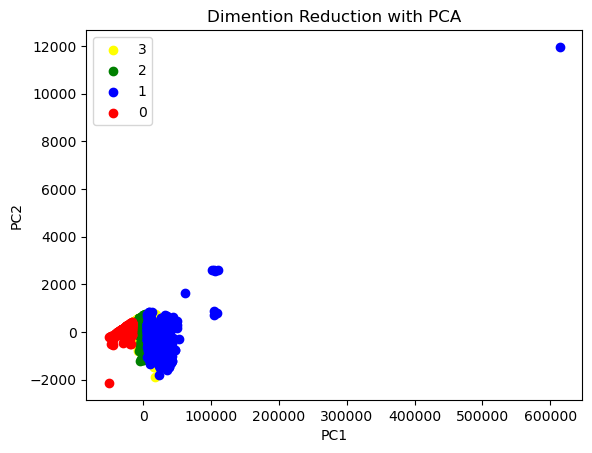

In [68]:
pca_df['tsne_kmeans_label'] = df['tsne_kmeans_label']

# Plot the anomalies in the reduced space
plt.scatter(pca_df.loc[pca_df['tsne_kmeans_label'] == 3, 'PC1'], pca_df.loc[pca_df['tsne_kmeans_label'] == 3, 'PC2'], color='yellow', label='3')
plt.scatter(pca_df.loc[pca_df['tsne_kmeans_label'] == 2, 'PC1'], pca_df.loc[pca_df['tsne_kmeans_label'] == 2, 'PC2'], color='green', label='2')
plt.scatter(pca_df.loc[pca_df['tsne_kmeans_label'] == 1, 'PC1'], pca_df.loc[pca_df['tsne_kmeans_label'] == 1, 'PC2'], color='blue', label='1')
plt.scatter(pca_df.loc[pca_df['tsne_kmeans_label'] == 0, 'PC1'], pca_df.loc[pca_df['tsne_kmeans_label'] == 0, 'PC2'], color='red', label='0')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Dimention Reduction with PCA')
plt.legend()
plt.show()

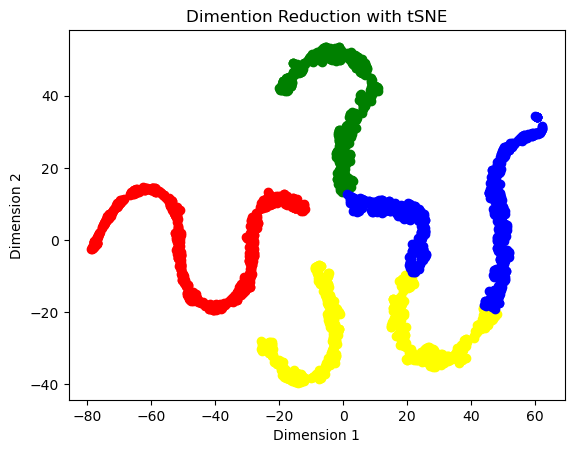

In [69]:
tsne_df['tsne_kmeans_label'] = df['tsne_kmeans_label']

# Plot the anomalies in the reduced space
plt.scatter(tsne_df.loc[tsne_df['tsne_kmeans_label'] == 3, 'PC1'], tsne_df.loc[tsne_df['tsne_kmeans_label'] == 3, 'PC2'], color='yellow', label='3')
plt.scatter(tsne_df.loc[tsne_df['tsne_kmeans_label'] == 2, 'PC1'], tsne_df.loc[tsne_df['tsne_kmeans_label'] == 2, 'PC2'], color='green', label='2')
plt.scatter(tsne_df.loc[tsne_df['tsne_kmeans_label'] == 1, 'PC1'], tsne_df.loc[tsne_df['tsne_kmeans_label'] == 1, 'PC2'], color='blue', label='1')
plt.scatter(tsne_df.loc[tsne_df['tsne_kmeans_label'] == 0, 'PC1'], tsne_df.loc[tsne_df['tsne_kmeans_label'] == 0, 'PC2'], color='red', label='0')
plt.title('Dimention Reduction with tSNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## DBScan

In [70]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors()
nbrs = neigh.fit(tsne_scaled)
distances, indices = nbrs.kneighbors(tsne_scaled)

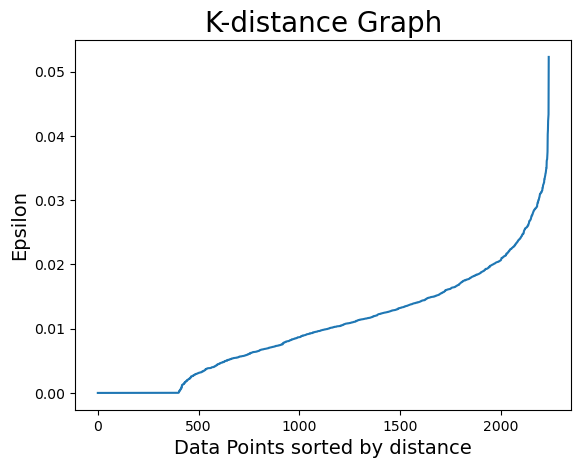

In [71]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [72]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.1)
dbscan.fit(tsne_scaled)

DBSCAN(eps=0.1)

In [73]:
df['tsne_dbscan_label'] = dbscan.labels_
df['tsne_dbscan_label'].unique()

array([0, 1, 2, 3])

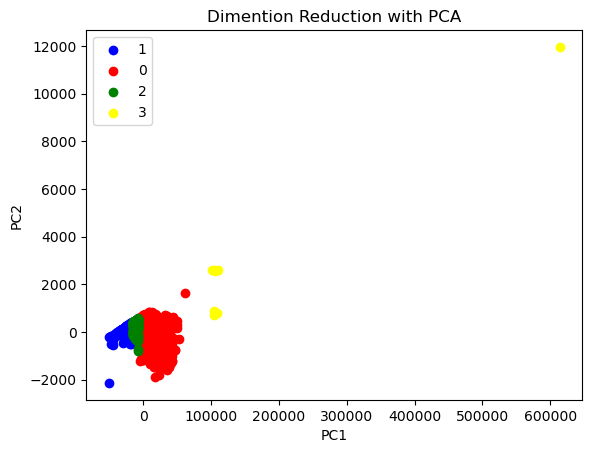

In [74]:
pca_df['tsne_dbscan_label'] = df['tsne_dbscan_label']

# Plot the anomalies in the reduced space
plt.scatter(pca_df.loc[pca_df['tsne_dbscan_label'] == 1, 'PC1'], pca_df.loc[pca_df['tsne_dbscan_label'] == 1, 'PC2'], color='blue', label='1')
plt.scatter(pca_df.loc[pca_df['tsne_dbscan_label'] == 0, 'PC1'], pca_df.loc[pca_df['tsne_dbscan_label'] == 0, 'PC2'], color='red', label='0')
plt.scatter(pca_df.loc[pca_df['tsne_dbscan_label'] == 2, 'PC1'], pca_df.loc[pca_df['tsne_dbscan_label'] == 2, 'PC2'], color='green', label='2')
plt.scatter(pca_df.loc[pca_df['tsne_dbscan_label'] == 3, 'PC1'], pca_df.loc[pca_df['tsne_dbscan_label'] == 3, 'PC2'], color='yellow', label='3')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Dimention Reduction with PCA')
plt.legend()
plt.show()

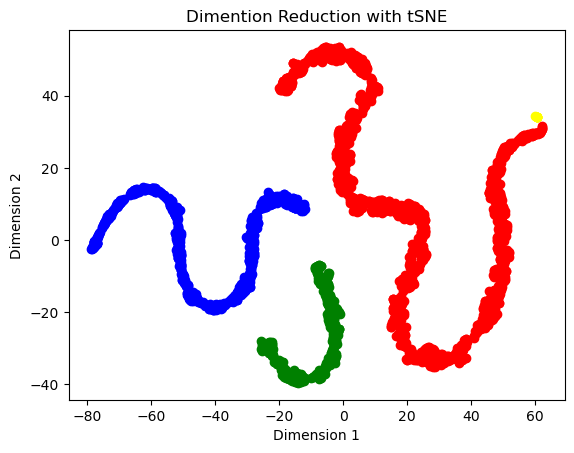

In [75]:
tsne_df['tsne_dbscan_label'] = df['tsne_dbscan_label']

# Plot the anomalies in the reduced space
plt.scatter(tsne_df.loc[tsne_df['tsne_dbscan_label'] == 1, 'PC1'], tsne_df.loc[tsne_df['tsne_dbscan_label'] == 1, 'PC2'], color='blue', label='1')
plt.scatter(tsne_df.loc[tsne_df['tsne_dbscan_label'] == 0, 'PC1'], tsne_df.loc[tsne_df['tsne_dbscan_label'] == 0, 'PC2'], color='red', label='0')
plt.scatter(tsne_df.loc[tsne_df['tsne_dbscan_label'] == 2, 'PC1'], tsne_df.loc[tsne_df['tsne_dbscan_label'] == 2, 'PC2'], color='green', label='2')
plt.scatter(tsne_df.loc[tsne_df['tsne_dbscan_label'] == 3, 'PC1'], tsne_df.loc[tsne_df['tsne_dbscan_label'] == 3, 'PC2'], color='yellow', label='3')
plt.title('Dimention Reduction with tSNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [76]:
pd.options.display.max_columns = None

In [77]:
features = ['Education']

In [80]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Days,Age,total_product,total_child,is_parent,kmeans_label,label_db,pca_kmeans_label,pca_label_db,tsne_kmeans_label,tsne_dbscan_label
0,3,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663.0,57,1617,0,0,1,0,1,0,1,0
1,3,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113.0,60,27,2,1,0,0,0,0,2,0
2,3,1,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312.0,49,776,0,0,1,0,1,0,3,0
3,3,1,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139.0,30,53,1,1,0,0,0,0,0,1
4,5,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161.0,33,422,1,1,0,0,0,0,1,0


# Mencari tahu arti dari setiap hasil cluster

Tidak ada jawaban pasti dari unsupervised learning. Dari sini kita bisa membandingkan hasil dari cluster berbagai model dan menggunakannya sesuai dengan rancangan dan tujuan awal mengapa kita ingin membuat cluster pada komsumen.

In [78]:
def plot_some(data, label):
  fig, axes = plt.subplots(4, 4,  figsize=(20,15))
  fig.tight_layout(pad=3)
  featurestoplot = ['Income', 'Education', 'Marital_Status', 'Age',
                    'Recency', 'total_child', 'Customer_Days', 'Complain',
                    'Response' ,'MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'total_product',
                    ]
  z = 0
  for x in range(0,4):
    for y in range(0,4):
      axes[x,y].set_title(featurestoplot[z])
      sns.boxplot(ax=axes[x, y], data=data, x=label, y=featurestoplot[z])
      z+=1
  plt.plot();

**Coba Interpretasi Antar Cluster dari metode kmeans pada data asli**

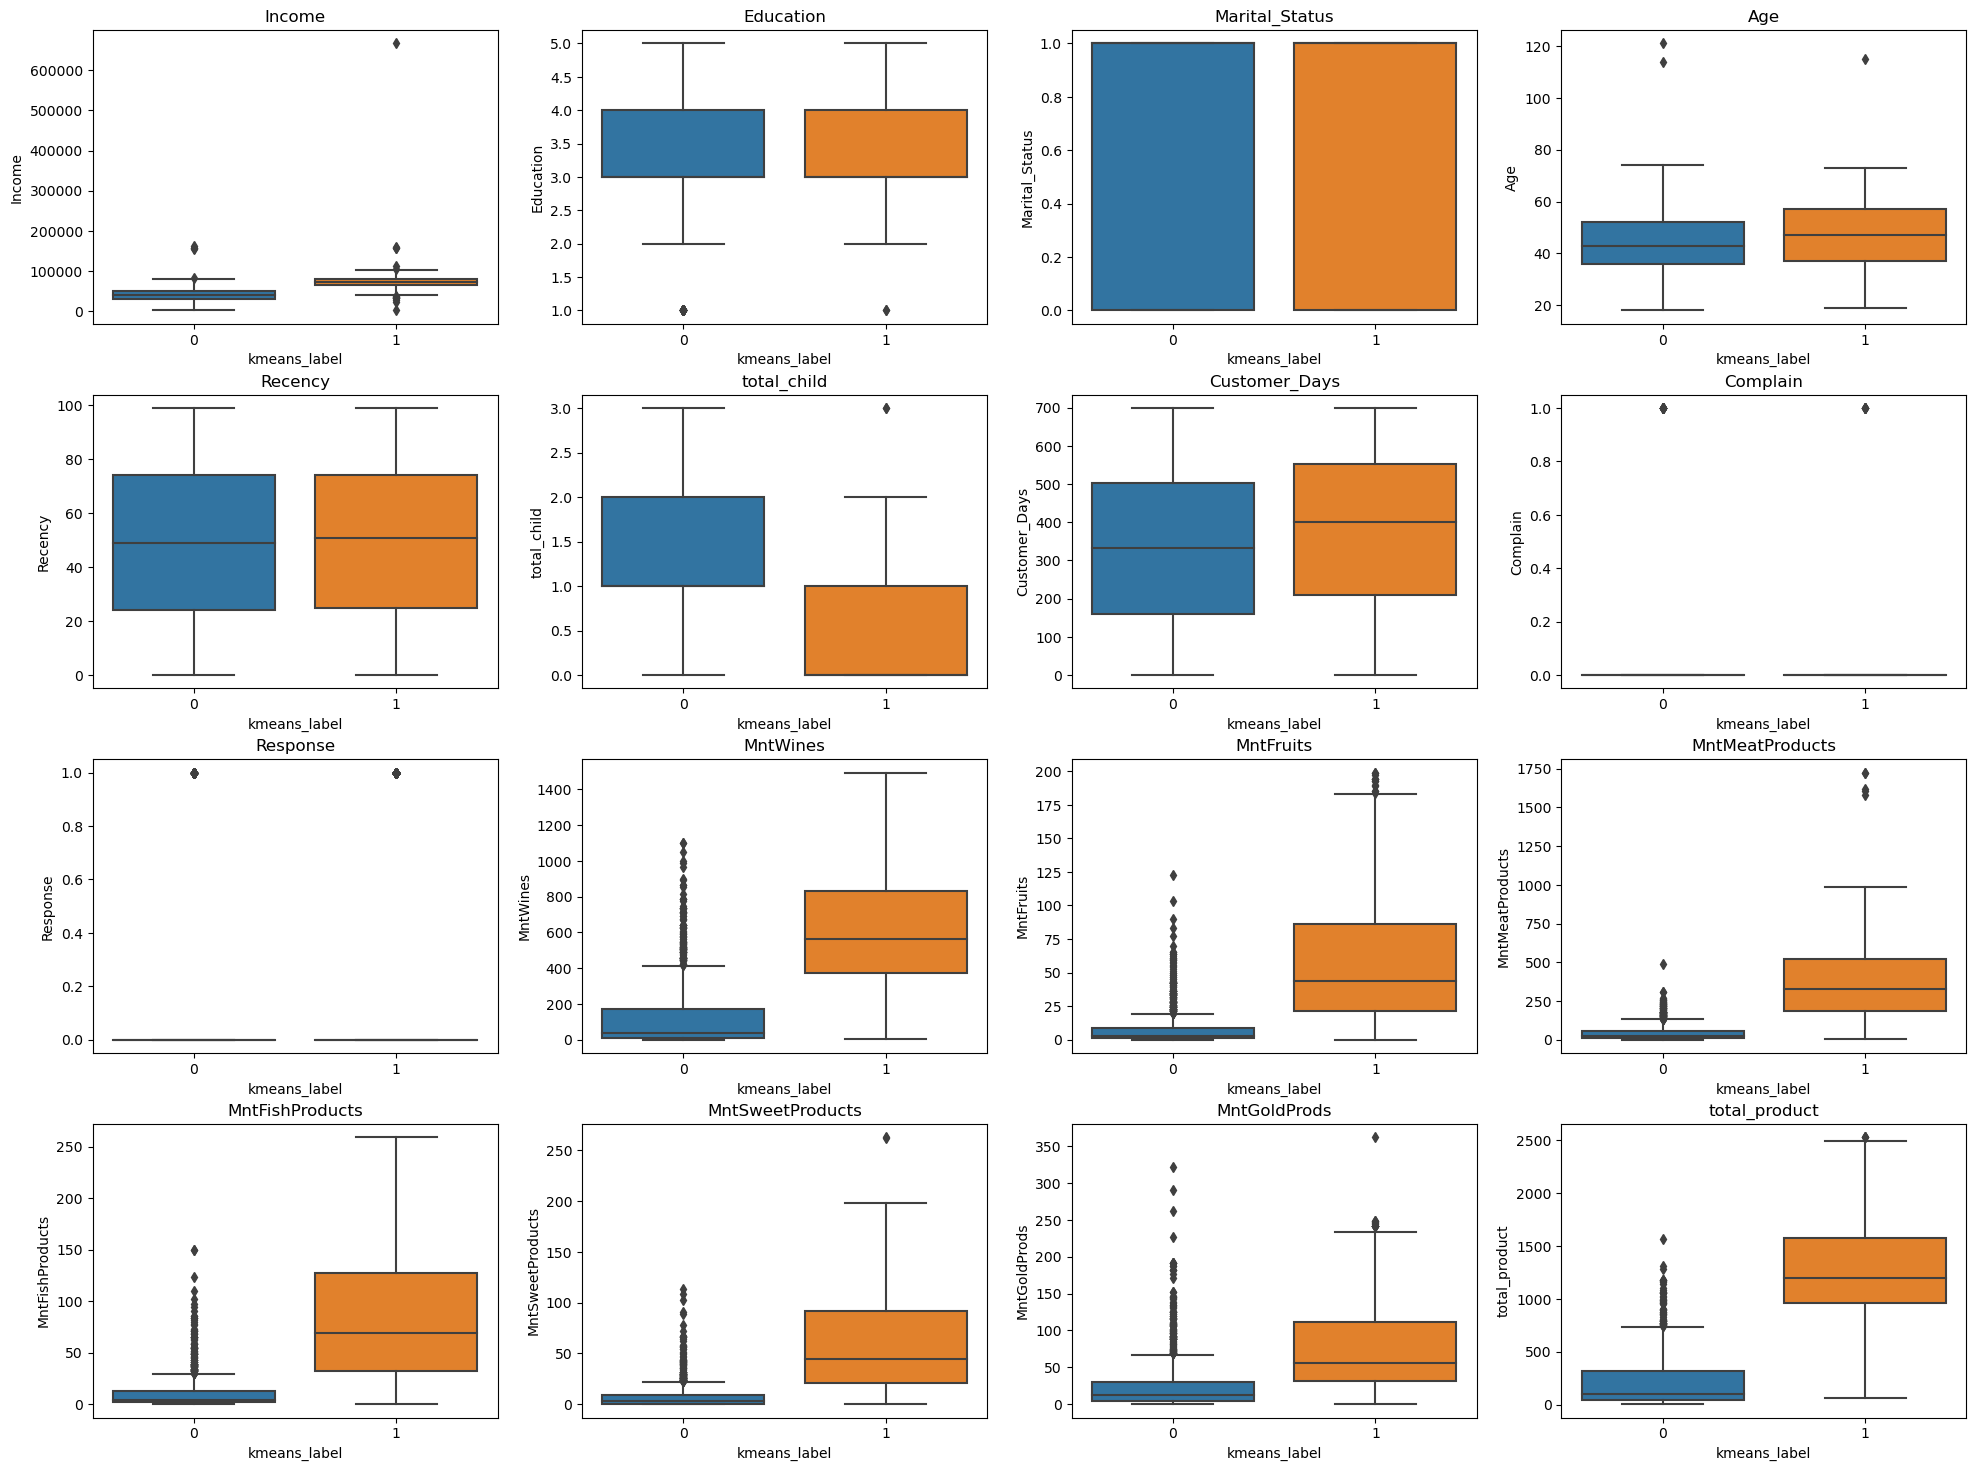

In [79]:
plot_some(df, 'kmeans_label')

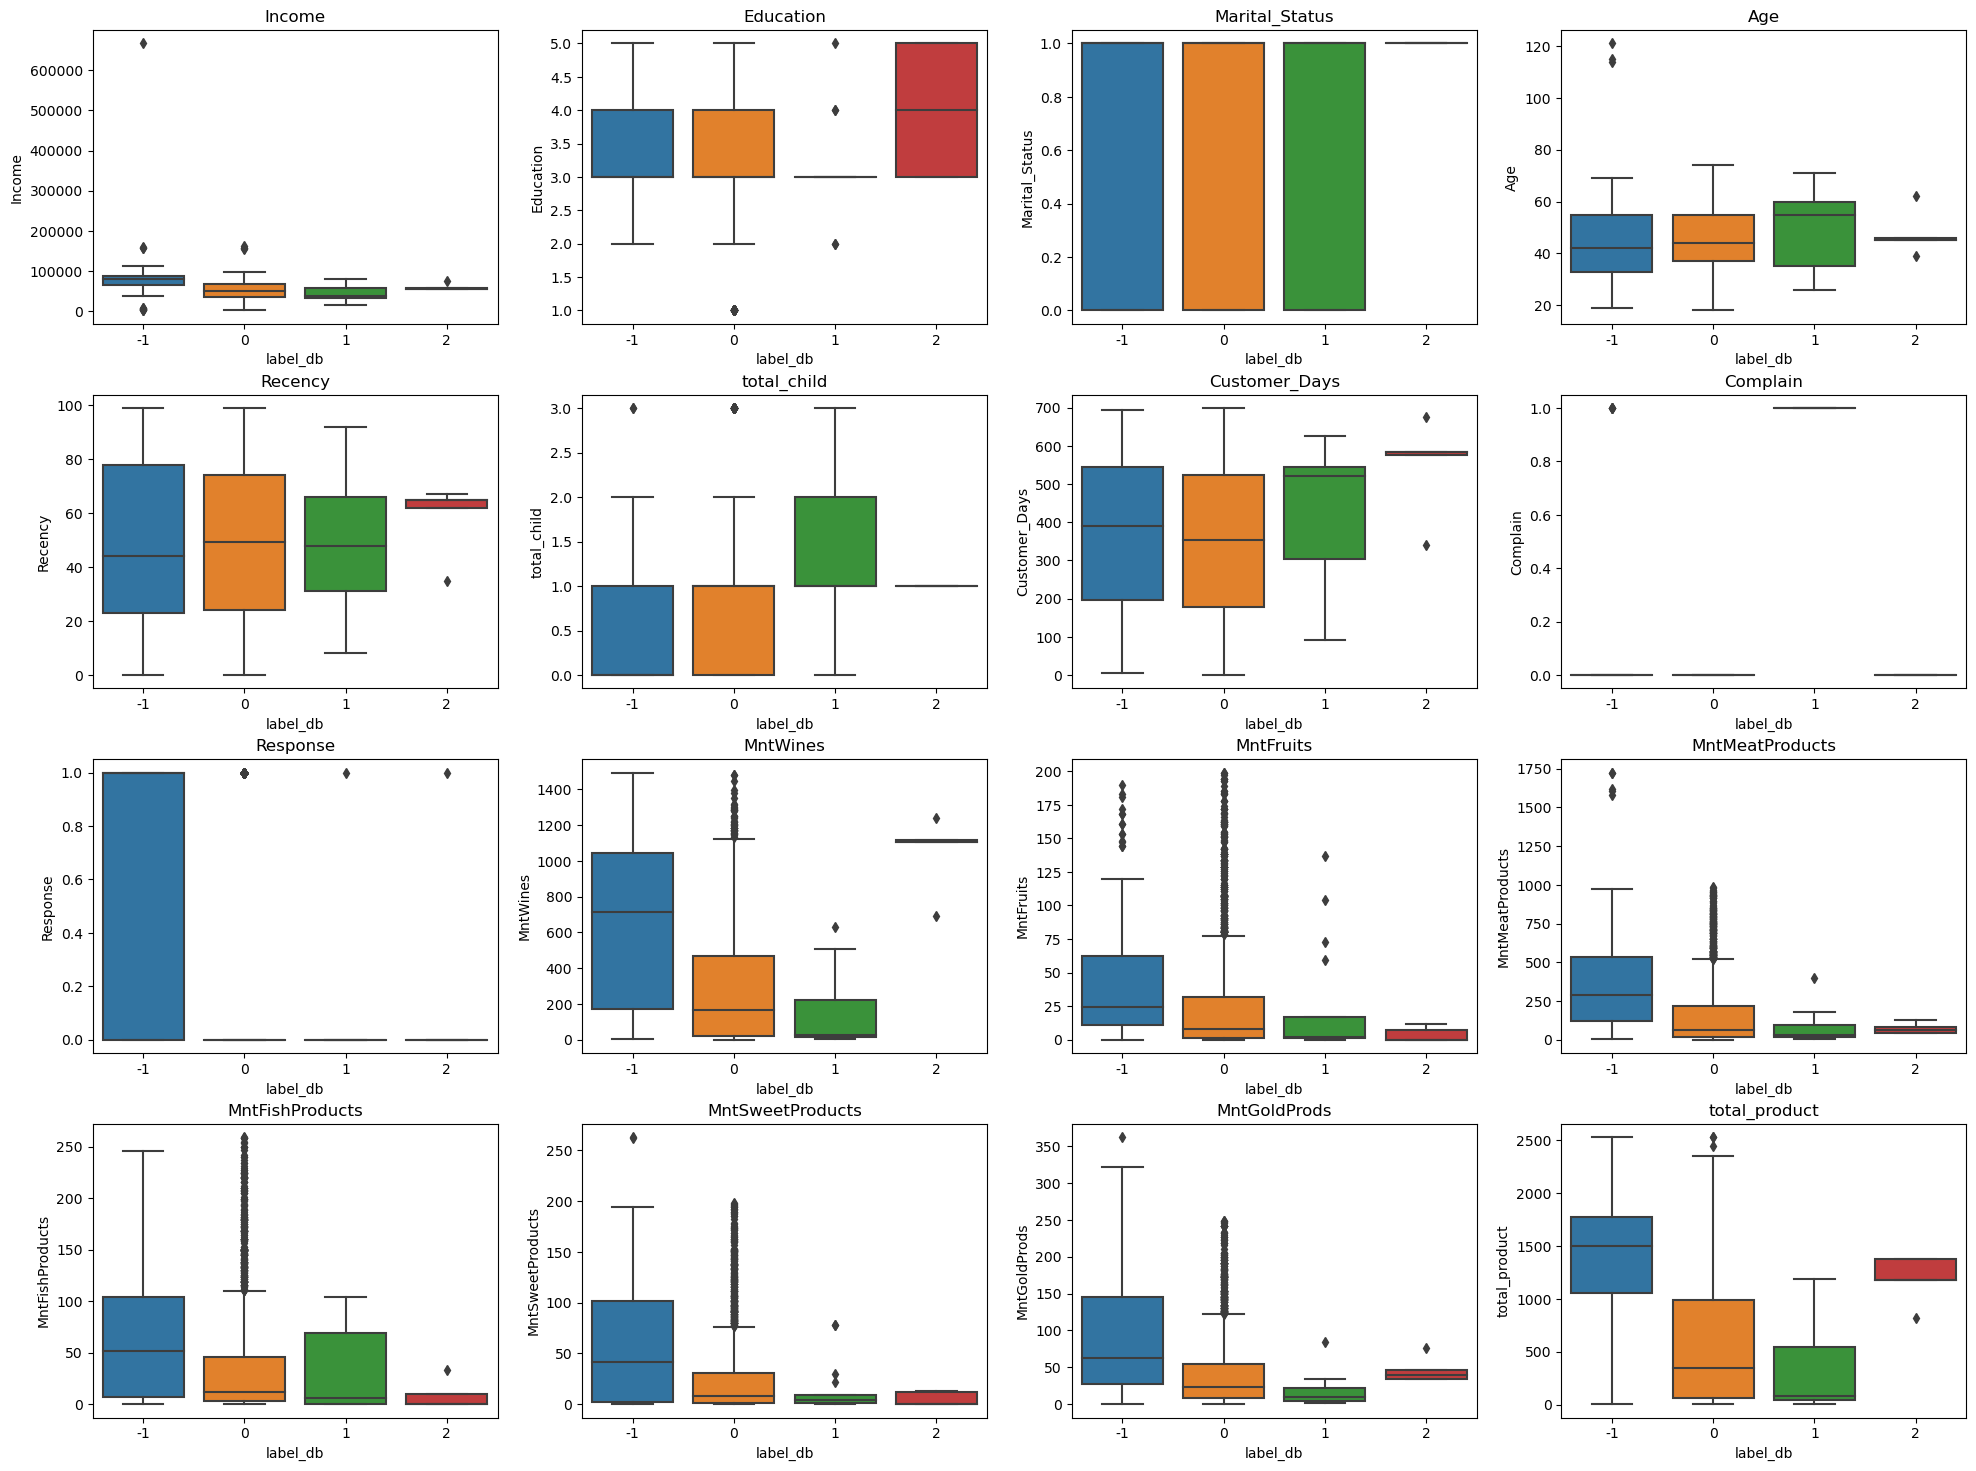

In [81]:
plot_some(df, 'label_db')

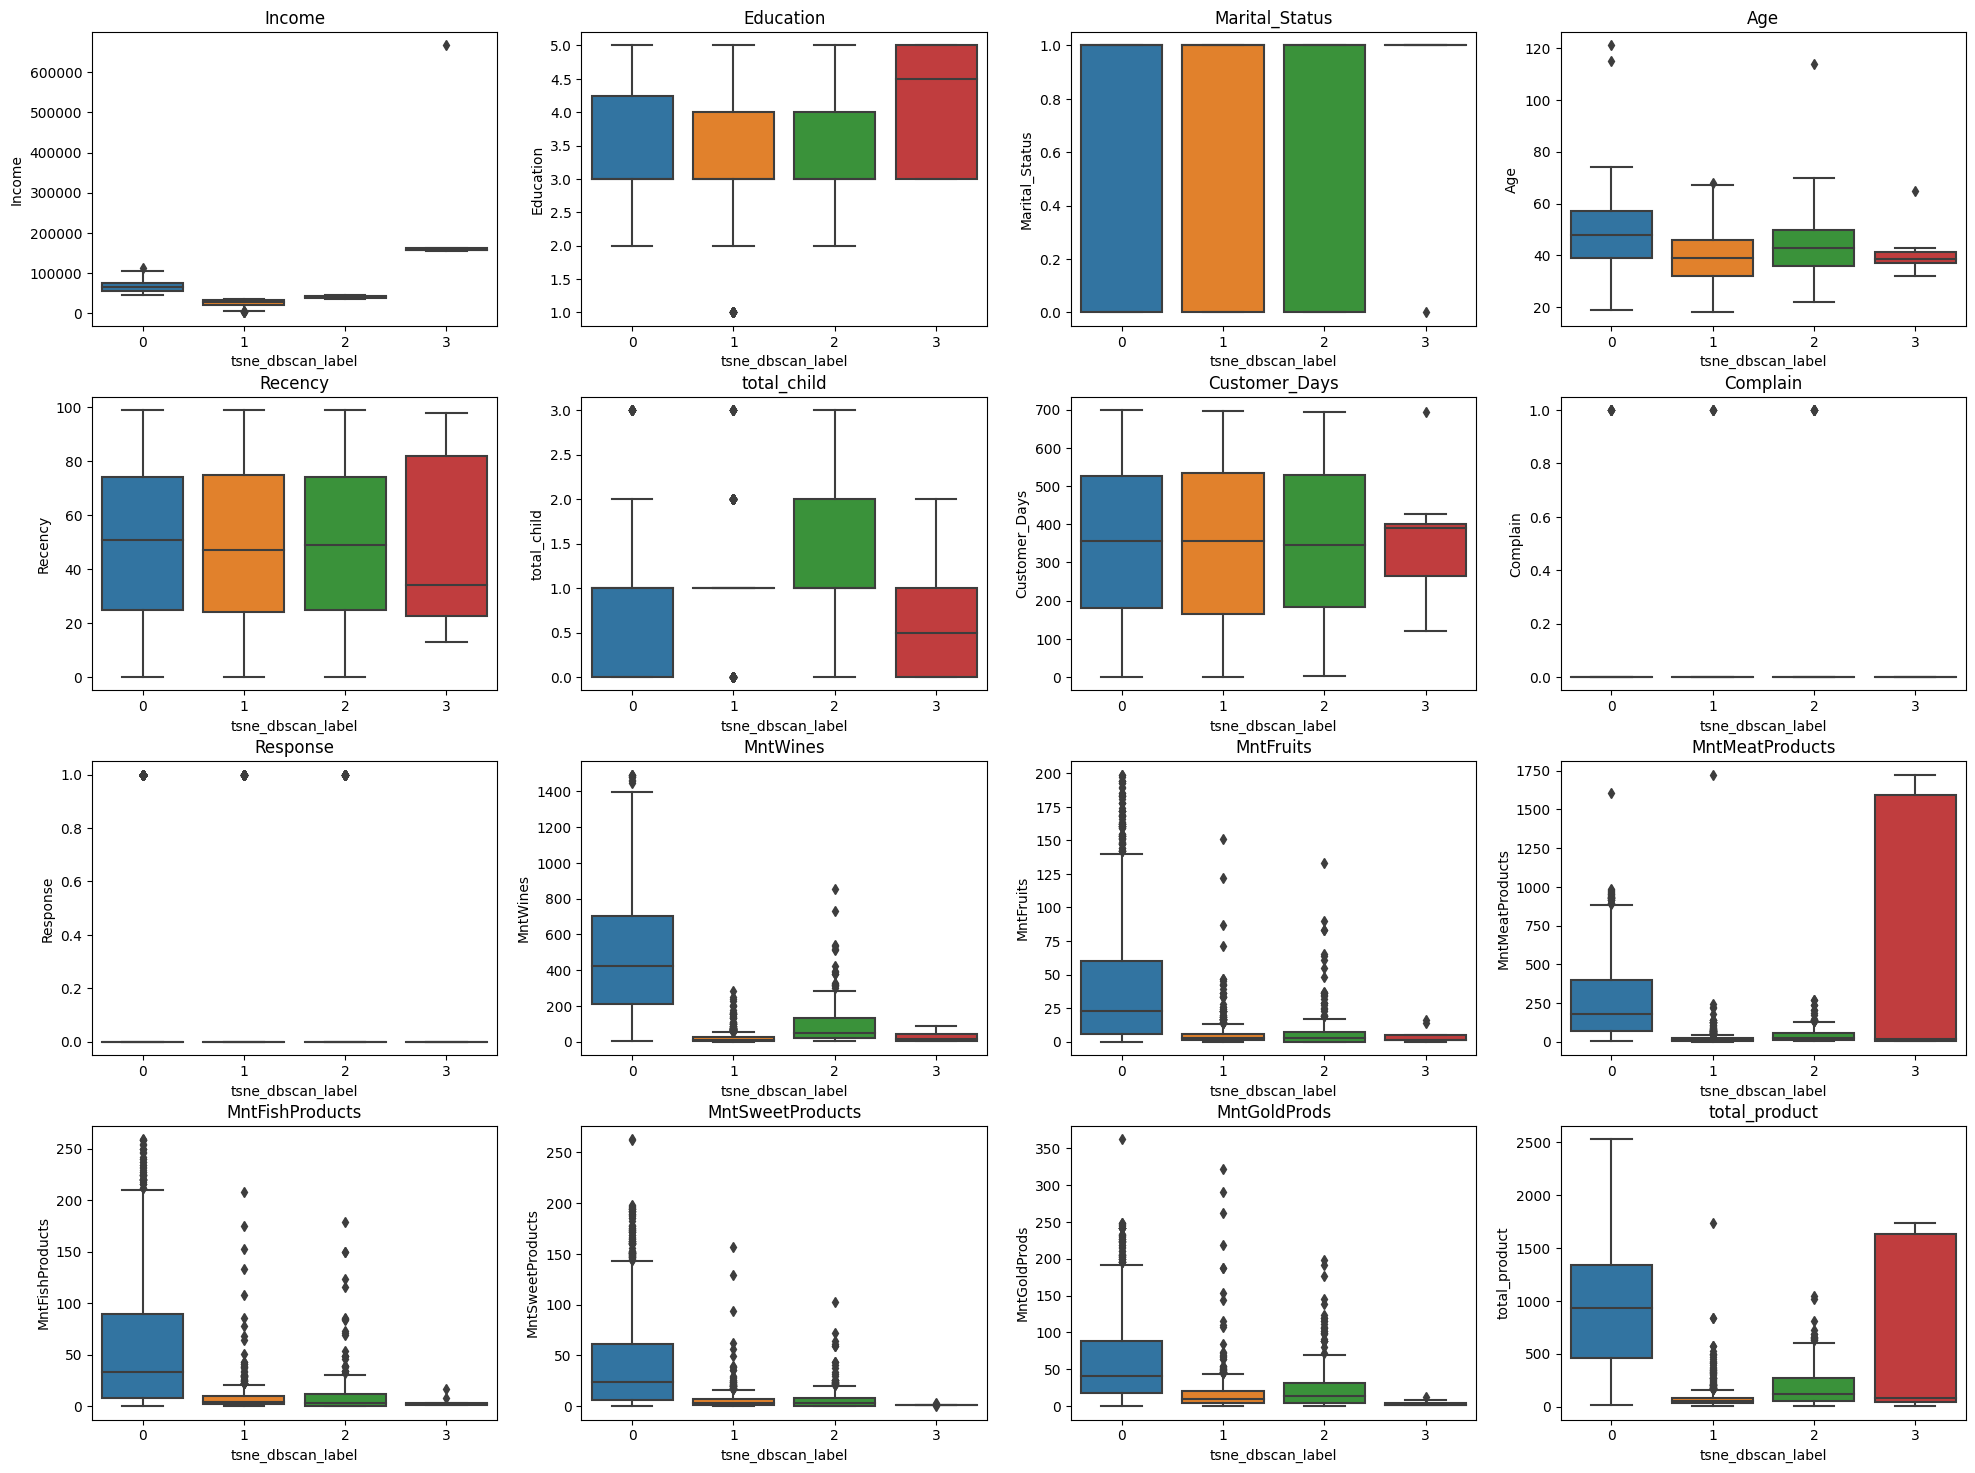

In [ ]:
plot_some(df, 'tsne_dbscan_label')

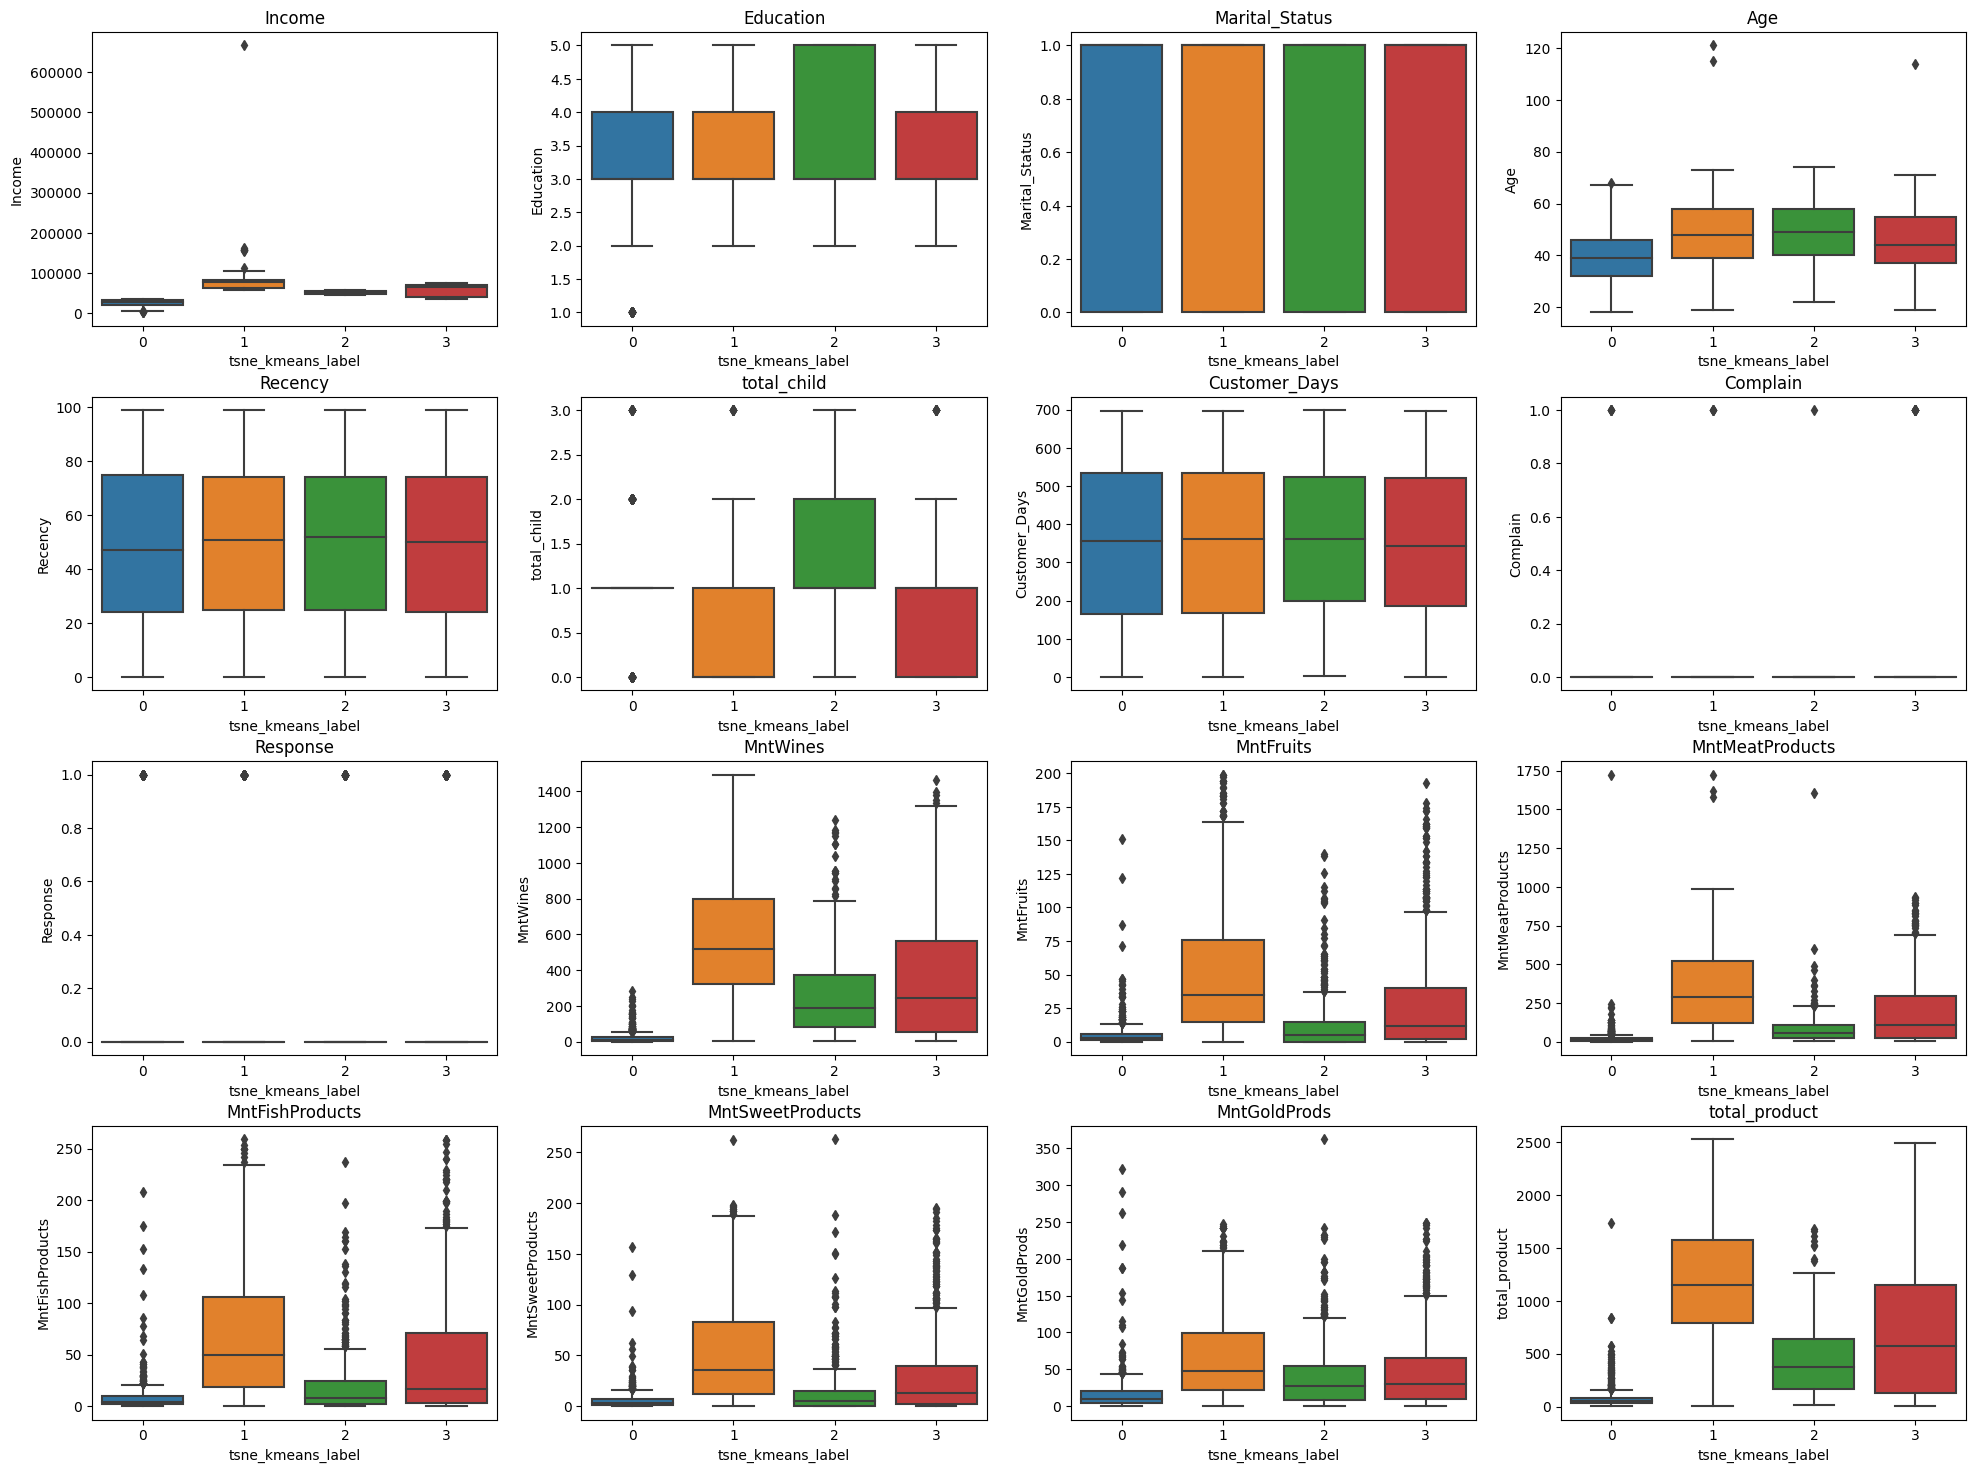

In [ ]:
plot_some(df, 'tsne_kmeans_label')